<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_10_david_net_90_acc/Session_10_CIFAR10_DavidNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 10
## Refer [link](https://github.com/siva-sankar-a/erav1/tree/session/session-6-multiple-architecture-check/session_6_multiple_architectures_mnist#readme) for further documentation

## Cloning the Github repository
## [Session 10](https://github.com/siva-sankar-a/erav1.git)

In [1]:
import numpy as np

In [2]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=77d0525e69db80399b3517c3250d2c271d7f18931458adb4b6c5a37e32a7b563
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [3]:
!pip install torch-lr-finder

In [4]:
!git clone https://github.com/siva-sankar-a/erav1.git

Cloning into 'erav1'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 321 (delta 103), reused 148 (delta 90), pack-reused 140
Receiving objects: 100% (321/321), 1.38 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [5]:
%cd /content/erav1

/content/erav1


In [ ]:
!git pull

## Adding the session folder to path in order to access the functions defined

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import os
import sys

In [8]:
sys.path.append('/content/erav1/session_10_david_net_90_acc/')

In [9]:
import importlib

In [10]:
import utils as U
import datasets as ds
import transforms as tf

In [126]:
U = importlib.reload(U)
ds = importlib.reload(ds)
tf = importlib.reload(tf)

## Get device

In [11]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


In [12]:
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [13]:
pd.options.plotting.backend = "plotly"

## Get train and test transforms

In [14]:
train_transforms = tf.get_train_transforms()
test_transforms = tf.get_test_transforms()

In [15]:
train_transforms = A.Compose(
    [
        A.CropAndPad(px=4, pad_mode=4, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.CoarseDropout(max_holes=8, max_height=8, max_width=8, min_holes=8, min_height=8, min_width=8,
                        fill_value=(0.4913997551666284, 0.48215855929893703, 0.446530913373161),
                        mask_fill_value=None, always_apply=False, p=0.5),
        A.Normalize(mean=(0.4913997551666284, 0.48215855929893703, 0.446530913373161),
                    std=(0.24703225141799082, 0.24348516474564, 0.26158783926049628)),
        ToTensorV2(),
    ]
)


test_transforms = A.Compose(
    [
        A.Normalize(mean=(0.4913997551666284, 0.48215855929893703, 0.446530913373161),
                    std=(0.24703225141799082, 0.24348516474564, 0.26158783926049628)),
        ToTensorV2(),
    ]
)

In [16]:
from torchvision import datasets, transforms
import numpy as np

In [17]:
from torch.utils.data import WeightedRandomSampler

In [18]:
class CIFAR10_Dataset(datasets.CIFAR10):
    def __init__(self, root="./data/", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

## Get dataset

In [19]:
train_dataset = CIFAR10_Dataset('../data', train=True, download=True, transform=train_transforms)
test_dataset = CIFAR10_Dataset('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:13<00:00, 12999460.21it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


## Get train and test dataloader

In [20]:
import torch

In [21]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

In [22]:
label_weights = { 0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}

In [23]:
_weights = [label_weights[label] for label in train_dataset.targets]

In [24]:
batch_size = 512
sampler = torch.utils.data.sampler.WeightedRandomSampler(_weights, len(train_dataset), replacement=False)

In [25]:
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_dataloader = ds.get_train_dataloader(train_dataset, sampler=sampler, **kwargs)
test_dataloader = ds.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

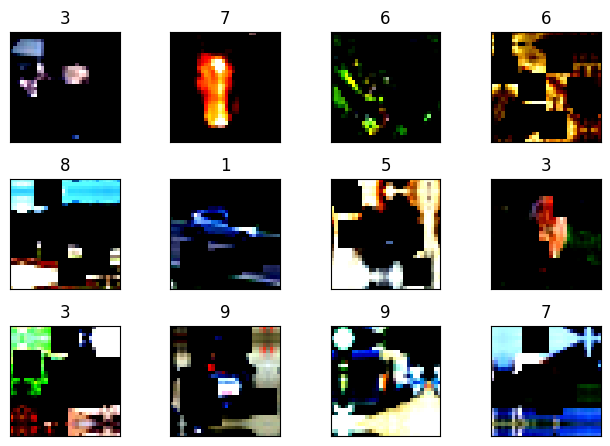

In [26]:
U.show_image_grid(train_dataloader)

In [27]:
!git clone https://github.com/Fangyh09/pytorch-receptive-field.git

Cloning into 'pytorch-receptive-field'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 111 (delta 37), reused 23 (delta 23), pack-reused 67
Receiving objects: 100% (111/111), 27.59 KiB | 13.80 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [28]:
sys.path.append('/content/erav1/pytorch-receptive-field')

In [29]:
from torch_receptive_field import receptive_field

In [30]:
import torch.nn as nn
from torchviz import make_dot
import torch.nn.functional as F

C1C2C3C40

In [31]:
class Net(nn.Module):

    '''
    This class implements the neural network model

    Usage:
    >>> device = ...
    >>> model = Net().to('cpu')
    '''

    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()

        # Prep Layer
        self.prep = self.conv3x3_bn_dropout(3, 64, padding=1)

        # Layer 1
        self.conv_bn_pool_1 = self.conv3x3_maxpool(64, 128)
        # Layer 1 - residual
        self.res_1 = self.conv3x3_bn_dropout(128, 128, padding=1)
        self.res_2 = self.conv3x3_bn_dropout(128, 128, padding=1)
        self.downsample_1 = self.conv1x1(128, 128)

        # Layer 2
        self.conv_bn_pool_2 = self.conv3x3_maxpool(128, 256)

        # Layer 3
        self.conv_bn_pool_3 = self.conv3x3_maxpool(256, 512)
        # Layer 3 - residual
        self.res_3 = self.conv3x3_bn_dropout(512, 512, padding=1)
        self.res_4 = self.conv3x3_bn_dropout(512, 512, padding=1)
        self.downsample_2 = self.conv1x1(512, 512)

        # Pool
        self.pool = nn.MaxPool2d(4)

        # Linear
        self.linear = nn.Linear(512, 10)

    def conv3x3_maxpool(self, in_channels, out_channels):
        layers = [self.conv3x3_bn_dropout(in_channels, out_channels, padding=1),
                  nn.MaxPool2d(2)]

        return nn.Sequential(
                    *layers
                )

    def conv3x3_bn_dropout(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=False, dropout=None, is_relu_bn=True):

          if is_relu_bn:
            layers = [
                  self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(),
            ]
          else:
            layers = [
                  self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias)
            ]

          if dropout:
            return nn.Sequential(
                    *layers,
                    nn.Dropout(dropout)
                )
          else:
            return nn.Sequential(
                    *layers
                )

    def conv3x3(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    dilation=dilation,
                    groups=groups,
                    bias=bias)

    def conv1x1(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)


    def forward(self, x):

        # Prep Layer
        x = self.prep(x)

        # Layer 1
        x = self.conv_bn_pool_1(x)
        # Layer 1 - residual
        i = x
        x = self.res_1(x)
        x = self.res_2(x)
        x = x + i

        # Layer 2
        x = self.conv_bn_pool_2(x)

        # Layer 3
        x = self.conv_bn_pool_3(x)
        # Layer 3 - residual
        i = x
        x = self.res_3(x)
        x = self.res_4(x)
        x = x + i

        # Pool
        x = self.pool(x)

        # Flatten
        x = x.view(-1, 512)

        # Linear
        self.linear(x)

        # return F.log_softmax(x, dim=1)

        return x

## LR range finder

In [150]:
from torch_lr_finder import LRFinder
import torch.optim as optim

In [151]:
model = Net().to('cuda')

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.18E-04


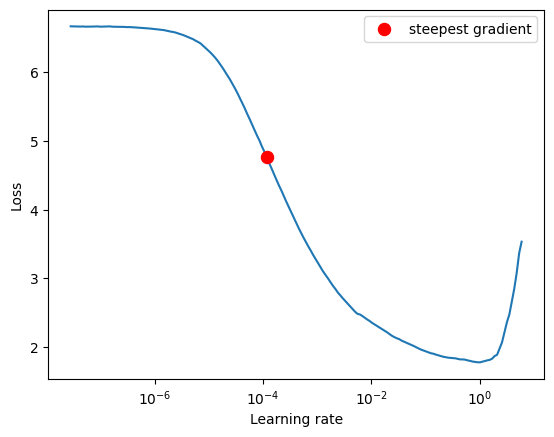

In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00000001, weight_decay=0)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, end_lr=10, num_iter=200)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## Generate model summary

In [153]:
from torchsummary import summary

In [154]:
model = Net().to('cpu')
summary(model, input_size=(3, 32, 32), batch_size=batch_size, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [512, 64, 32, 32]           1,728
       BatchNorm2d-2          [512, 64, 32, 32]             128
              ReLU-3          [512, 64, 32, 32]               0
            Conv2d-4         [512, 128, 32, 32]          73,728
       BatchNorm2d-5         [512, 128, 32, 32]             256
              ReLU-6         [512, 128, 32, 32]               0
         MaxPool2d-7         [512, 128, 16, 16]               0
            Conv2d-8         [512, 128, 16, 16]         147,456
       BatchNorm2d-9         [512, 128, 16, 16]             256
             ReLU-10         [512, 128, 16, 16]               0
           Conv2d-11         [512, 128, 16, 16]         147,456
      BatchNorm2d-12         [512, 128, 16, 16]             256
             ReLU-13         [512, 128, 16, 16]               0
           Conv2d-14         [512, 256,

In [56]:
receptive_field(model.cpu(), input_size=(3, 32, 32), device='cpu')

------------------------------------------------------------------------------
        Layer (type)    map size      start       jump receptive_field 
        0               [32, 32]        0.5        1.0             1.0 
        1               [32, 32]        0.5        1.0             3.0 
        2               [32, 32]        0.5        1.0             3.0 
        3               [32, 32]        0.5        1.0             3.0 
        4               [32, 32]        0.5        1.0             5.0 
        5               [32, 32]        0.5        1.0             5.0 
        6               [32, 32]        0.5        1.0             5.0 
        7               [16, 16]        1.0        2.0             6.0 
        8               [16, 16]        1.0        2.0            10.0 
        9               [16, 16]        1.0        2.0            10.0 
        10              [16, 16]        1.0        2.0            10.0 
        11              [16, 16]        1.0        2.0   

OrderedDict([('0',
              OrderedDict([('j', 1.0),
                           ('r', 1.0),
                           ('start', 0.5),
                           ('conv_stage', True),
                           ('output_shape', [-1, 3, 32, 32])])),
             ('1',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 64, 32, 32])])),
             ('2',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 64, 32, 32]),
                           ('output_shape', [-1, 64, 32, 32])])),
             ('3',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 64, 32, 32]),
         

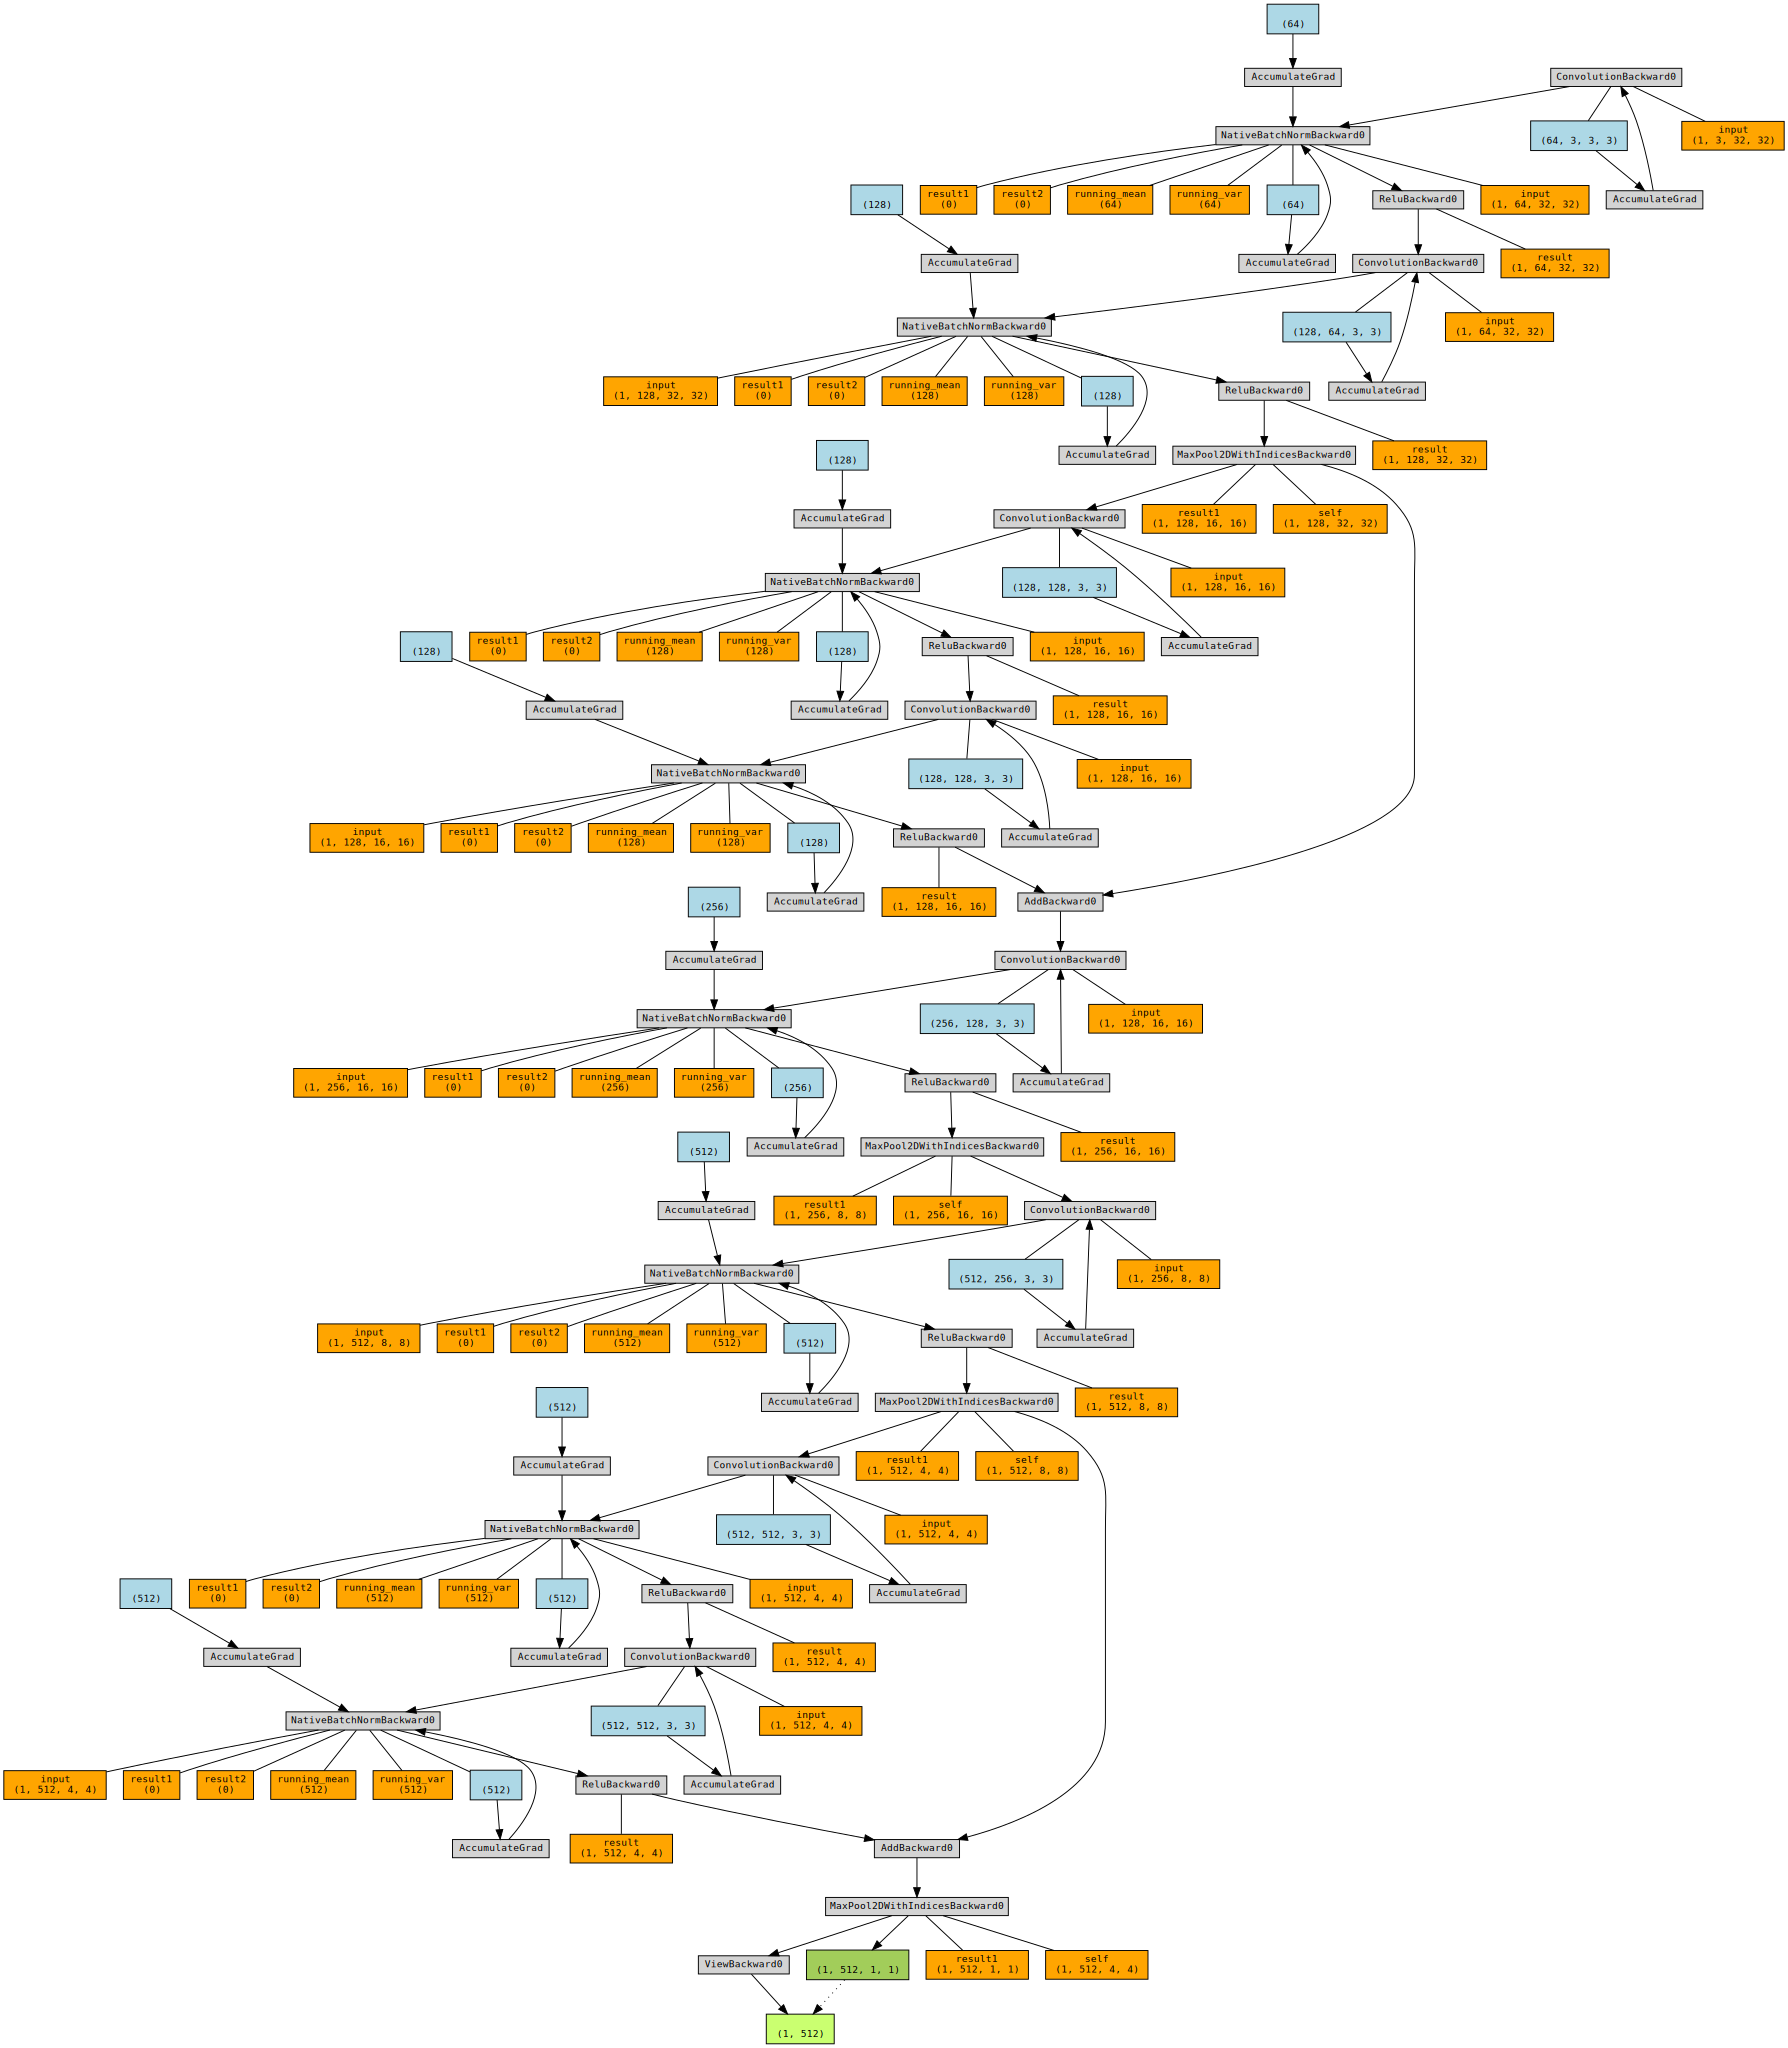

In [38]:
random_input = torch.randn(1, 3, 32, 32)
model.eval()
y = model(random_input)
dot_graph = make_dot(y, show_attrs=False, show_saved=True)
dot_graph.format = 'svg'
dot_graph.render(f'net')
dot_graph

## Training

In [168]:
model = Net().to(device)

In [169]:
import torch.optim as optim

In [170]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

In [171]:
num_epochs = 60
momentum = 0.9
max_lr = 1E-03
regularization = None
epochs_up = 20
base_momentum = 0.85
div_factor = 100

steps_per_epoch = len(train_dataloader)
total_steps = num_epochs * steps_per_epoch
pct_start = epochs_up / num_epochs

In [172]:
optimizer = optim.Adam(model.parameters(), lr=0.1)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr=max_lr,
                                          total_steps=total_steps,
                                          epochs=num_epochs,
                                          steps_per_epoch=steps_per_epoch,
                                          pct_start=pct_start,
                                          anneal_strategy='linear',
                                          cycle_momentum=True,
                                          base_momentum=base_momentum,
                                          max_momentum=momentum,
                                          div_factor=div_factor,
                                          verbose=False)

In [173]:
metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics, scheduler)
    U.test(model, device, test_dataloader, metrics, None, get_misclassified=(epoch == num_epochs))
    # break
    # scheduler.step()

Epoch 1


Train: Loss=1.9506 Batch_id=97 Accuracy=25.10: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.45      0.61      0.52      1000
           1       0.63      0.52      0.57      1000
           2       0.43      0.23      0.30      1000
           3       0.30      0.30      0.30      1000
           4       0.38      0.35      0.37      1000
           5       0.34      0.44      0.38      1000
           6       0.52      0.55      0.53      1000
           7       0.40      0.59      0.48      1000
           8       0.57      0.46      0.51      1000
           9       0.58      0.42      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000

Test set: Average loss: 1.9074, Accuracy: 4469/10000 (44.69%)

Epoch 2


Train: Loss=1.6276 Batch_id=97 Accuracy=43.75: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1000
           1       0.72      0.68      0.70      1000
           2       0.43      0.47      0.45      1000
           3       0.43      0.28      0.34      1000
           4       0.47      0.39      0.43      1000
           5       0.48      0.42      0.45      1000
           6       0.61      0.70      0.66      1000
           7       0.52      0.71      0.60      1000
           8       0.65      0.69      0.67      1000
           9       0.61      0.67      0.64      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.55     10000
weighted avg       0.56      0.56      0.55     10000

Test set: Average loss: 1.3822, Accuracy: 5614/10000 (56.14%)

Epoch 3


Train: Loss=1.4347 Batch_id=97 Accuracy=51.21: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1000
           1       0.60      0.86      0.71      1000
           2       0.42      0.56      0.48      1000
           3       0.44      0.34      0.38      1000
           4       0.59      0.40      0.48      1000
           5       0.55      0.35      0.43      1000
           6       0.62      0.77      0.68      1000
           7       0.73      0.63      0.67      1000
           8       0.65      0.80      0.72      1000
           9       0.72      0.58      0.64      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000

Test set: Average loss: 1.2276, Accuracy: 5953/10000 (59.53%)

Epoch 4


Train: Loss=1.0378 Batch_id=97 Accuracy=56.10: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1000
           1       0.65      0.84      0.74      1000
           2       0.40      0.65      0.49      1000
           3       0.49      0.30      0.37      1000
           4       0.78      0.28      0.42      1000
           5       0.66      0.42      0.51      1000
           6       0.56      0.86      0.68      1000
           7       0.74      0.68      0.71      1000
           8       0.84      0.64      0.72      1000
           9       0.61      0.84      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.65      0.61      0.60     10000
weighted avg       0.65      0.61      0.60     10000

Test set: Average loss: 1.1671, Accuracy: 6148/10000 (61.48%)

Epoch 5


Train: Loss=1.1221 Batch_id=97 Accuracy=60.08: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1000
           1       0.84      0.78      0.81      1000
           2       0.63      0.50      0.56      1000
           3       0.36      0.69      0.47      1000
           4       0.67      0.59      0.63      1000
           5       0.49      0.57      0.53      1000
           6       0.82      0.61      0.70      1000
           7       0.86      0.60      0.71      1000
           8       0.80      0.75      0.78      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.65     10000
   macro avg       0.70      0.65      0.66     10000
weighted avg       0.70      0.65      0.66     10000

Test set: Average loss: 1.0131, Accuracy: 6537/10000 (65.37%)

Epoch 6


Train: Loss=1.1560 Batch_id=97 Accuracy=62.44: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.61      0.87      0.72      1000
           1       0.74      0.91      0.81      1000
           2       0.62      0.54      0.58      1000
           3       0.56      0.49      0.52      1000
           4       0.63      0.69      0.66      1000
           5       0.60      0.64      0.62      1000
           6       0.70      0.84      0.76      1000
           7       0.87      0.67      0.76      1000
           8       0.92      0.62      0.74      1000
           9       0.89      0.71      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

Test set: Average loss: 0.8902, Accuracy: 6977/10000 (69.77%)

Epoch 7


Train: Loss=0.9762 Batch_id=97 Accuracy=64.98: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.86      0.77      0.81      1000
           2       0.63      0.60      0.61      1000
           3       0.58      0.47      0.52      1000
           4       0.77      0.61      0.68      1000
           5       0.56      0.74      0.64      1000
           6       0.81      0.74      0.78      1000
           7       0.79      0.77      0.78      1000
           8       0.79      0.85      0.82      1000
           9       0.68      0.89      0.77      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000

Test set: Average loss: 0.8460, Accuracy: 7166/10000 (71.66%)

Epoch 8


Train: Loss=1.0595 Batch_id=97 Accuracy=66.88: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1000
           1       0.92      0.81      0.86      1000
           2       0.57      0.71      0.63      1000
           3       0.58      0.59      0.58      1000
           4       0.82      0.56      0.66      1000
           5       0.61      0.65      0.63      1000
           6       0.73      0.86      0.79      1000
           7       0.85      0.74      0.79      1000
           8       0.75      0.91      0.82      1000
           9       0.87      0.82      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

Test set: Average loss: 0.7770, Accuracy: 7360/10000 (73.60%)

Epoch 9


Train: Loss=0.8040 Batch_id=97 Accuracy=68.82: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.84      0.64      0.73      1000
           1       0.92      0.79      0.85      1000
           2       0.78      0.52      0.62      1000
           3       0.49      0.69      0.57      1000
           4       0.61      0.81      0.70      1000
           5       0.83      0.35      0.49      1000
           6       0.64      0.90      0.75      1000
           7       0.79      0.79      0.79      1000
           8       0.70      0.93      0.80      1000
           9       0.91      0.72      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.71     10000
weighted avg       0.75      0.72      0.71     10000

Test set: Average loss: 0.8478, Accuracy: 7156/10000 (71.56%)

Epoch 10


Train: Loss=0.8091 Batch_id=97 Accuracy=70.52: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1000
           1       0.88      0.87      0.88      1000
           2       0.59      0.75      0.66      1000
           3       0.55      0.62      0.58      1000
           4       0.89      0.46      0.60      1000
           5       0.60      0.72      0.66      1000
           6       0.84      0.76      0.80      1000
           7       0.82      0.81      0.81      1000
           8       0.82      0.88      0.85      1000
           9       0.79      0.88      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.74     10000
weighted avg       0.76      0.74      0.74     10000

Test set: Average loss: 0.7771, Accuracy: 7436/10000 (74.36%)

Epoch 11


Train: Loss=0.7594 Batch_id=97 Accuracy=71.79: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.90      0.90      0.90      1000
           2       0.67      0.75      0.71      1000
           3       0.64      0.59      0.62      1000
           4       0.68      0.87      0.76      1000
           5       0.73      0.65      0.68      1000
           6       0.84      0.84      0.84      1000
           7       0.88      0.78      0.82      1000
           8       0.92      0.83      0.87      1000
           9       0.88      0.86      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Test set: Average loss: 0.6303, Accuracy: 7881/10000 (78.81%)

Epoch 12


Train: Loss=0.7302 Batch_id=97 Accuracy=73.33: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.89      0.91      0.90      1000
           2       0.52      0.82      0.64      1000
           3       0.74      0.51      0.60      1000
           4       0.83      0.62      0.71      1000
           5       0.68      0.77      0.72      1000
           6       0.85      0.81      0.83      1000
           7       0.88      0.78      0.82      1000
           8       0.84      0.91      0.88      1000
           9       0.90      0.86      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000

Test set: Average loss: 0.6676, Accuracy: 7779/10000 (77.79%)

Epoch 13


Train: Loss=0.6516 Batch_id=97 Accuracy=74.21: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.68      0.91      0.77      1000
           1       0.86      0.92      0.89      1000
           2       0.51      0.82      0.63      1000
           3       0.55      0.69      0.61      1000
           4       0.89      0.58      0.70      1000
           5       0.92      0.36      0.52      1000
           6       0.88      0.78      0.82      1000
           7       0.85      0.79      0.82      1000
           8       0.88      0.85      0.87      1000
           9       0.92      0.84      0.88      1000

    accuracy                           0.75     10000
   macro avg       0.79      0.75      0.75     10000
weighted avg       0.79      0.75      0.75     10000

Test set: Average loss: 0.7223, Accuracy: 7525/10000 (75.25%)

Epoch 14


Train: Loss=0.6669 Batch_id=97 Accuracy=75.28: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.92      0.88      0.90      1000
           2       0.64      0.77      0.70      1000
           3       0.62      0.63      0.62      1000
           4       0.89      0.67      0.77      1000
           5       0.71      0.71      0.71      1000
           6       0.93      0.74      0.83      1000
           7       0.83      0.87      0.85      1000
           8       0.89      0.86      0.87      1000
           9       0.80      0.93      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

Test set: Average loss: 0.6149, Accuracy: 7914/10000 (79.14%)

Epoch 15


Train: Loss=0.7253 Batch_id=97 Accuracy=76.11: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


              precision    recall  f1-score   support

           0       0.94      0.67      0.79      1000
           1       0.92      0.89      0.90      1000
           2       0.76      0.68      0.72      1000
           3       0.55      0.77      0.64      1000
           4       0.66      0.88      0.75      1000
           5       0.84      0.59      0.69      1000
           6       0.89      0.82      0.85      1000
           7       0.86      0.85      0.85      1000
           8       0.91      0.89      0.90      1000
           9       0.83      0.91      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.81      0.79      0.80     10000

Test set: Average loss: 0.6161, Accuracy: 7943/10000 (79.43%)

Epoch 16


Train: Loss=0.7238 Batch_id=97 Accuracy=76.95: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.93      0.86      0.90      1000
           2       0.60      0.81      0.69      1000
           3       0.60      0.70      0.65      1000
           4       0.71      0.85      0.77      1000
           5       0.72      0.68      0.70      1000
           6       0.97      0.70      0.81      1000
           7       0.96      0.68      0.80      1000
           8       0.93      0.87      0.90      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000

Test set: Average loss: 0.6340, Accuracy: 7901/10000 (79.01%)

Epoch 17


Train: Loss=0.6811 Batch_id=97 Accuracy=77.67: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.97      0.83      0.89      1000
           2       0.57      0.85      0.68      1000
           3       0.66      0.66      0.66      1000
           4       0.80      0.79      0.79      1000
           5       0.79      0.65      0.71      1000
           6       0.87      0.85      0.86      1000
           7       0.90      0.81      0.85      1000
           8       0.88      0.88      0.88      1000
           9       0.91      0.84      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.80     10000
weighted avg       0.82      0.80      0.80     10000

Test set: Average loss: 0.5935, Accuracy: 7991/10000 (79.91%)

Epoch 18


Train: Loss=0.6262 Batch_id=97 Accuracy=78.32: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.77      0.87      0.81      1000
           1       0.89      0.92      0.90      1000
           2       0.75      0.74      0.74      1000
           3       0.81      0.42      0.56      1000
           4       0.89      0.67      0.76      1000
           5       0.68      0.78      0.73      1000
           6       0.78      0.91      0.84      1000
           7       0.72      0.94      0.82      1000
           8       0.93      0.83      0.88      1000
           9       0.84      0.91      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.79     10000
weighted avg       0.81      0.80      0.79     10000

Test set: Average loss: 0.5999, Accuracy: 7984/10000 (79.84%)

Epoch 19


Train: Loss=0.6061 Batch_id=97 Accuracy=78.96: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.73      0.92      0.82      1000
           1       0.88      0.92      0.90      1000
           2       0.68      0.83      0.75      1000
           3       0.72      0.64      0.68      1000
           4       0.92      0.64      0.75      1000
           5       0.80      0.74      0.77      1000
           6       0.85      0.88      0.87      1000
           7       0.74      0.92      0.82      1000
           8       0.97      0.80      0.88      1000
           9       0.94      0.82      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

Test set: Average loss: 0.5686, Accuracy: 8103/10000 (81.03%)

Epoch 20


Train: Loss=0.6173 Batch_id=97 Accuracy=80.00: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.89      0.94      0.91      1000
           2       0.80      0.71      0.75      1000
           3       0.71      0.62      0.66      1000
           4       0.92      0.68      0.78      1000
           5       0.54      0.89      0.67      1000
           6       0.93      0.82      0.87      1000
           7       0.89      0.82      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.91      0.88      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.82     10000
weighted avg       0.83      0.81      0.82     10000

Test set: Average loss: 0.5619, Accuracy: 8134/10000 (81.34%)

Epoch 21


Train: Loss=0.5318 Batch_id=97 Accuracy=80.90: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.95      0.89      0.91      1000
           2       0.82      0.72      0.77      1000
           3       0.68      0.70      0.69      1000
           4       0.82      0.86      0.84      1000
           5       0.69      0.83      0.75      1000
           6       0.93      0.83      0.88      1000
           7       0.92      0.85      0.88      1000
           8       0.88      0.93      0.90      1000
           9       0.92      0.89      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test set: Average loss: 0.4858, Accuracy: 8375/10000 (83.75%)

Epoch 22


Train: Loss=0.5791 Batch_id=97 Accuracy=81.73: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.86      0.96      0.91      1000
           2       0.61      0.86      0.72      1000
           3       0.77      0.63      0.69      1000
           4       0.74      0.90      0.81      1000
           5       0.84      0.71      0.77      1000
           6       0.94      0.84      0.89      1000
           7       0.94      0.79      0.86      1000
           8       0.89      0.93      0.91      1000
           9       0.97      0.81      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

Test set: Average loss: 0.5209, Accuracy: 8263/10000 (82.63%)

Epoch 23


Train: Loss=0.5422 Batch_id=97 Accuracy=82.69: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.86      0.96      0.91      1000
           2       0.75      0.81      0.78      1000
           3       0.63      0.78      0.69      1000
           4       0.91      0.73      0.81      1000
           5       0.82      0.74      0.78      1000
           6       0.87      0.92      0.89      1000
           7       0.90      0.86      0.88      1000
           8       0.91      0.90      0.91      1000
           9       0.95      0.87      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Test set: Average loss: 0.4723, Accuracy: 8402/10000 (84.02%)

Epoch 24


Train: Loss=0.4048 Batch_id=97 Accuracy=83.54: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1000
           1       0.90      0.93      0.91      1000
           2       0.58      0.90      0.70      1000
           3       0.64      0.74      0.68      1000
           4       0.86      0.79      0.82      1000
           5       0.76      0.75      0.76      1000
           6       0.92      0.82      0.87      1000
           7       0.93      0.81      0.87      1000
           8       0.96      0.84      0.90      1000
           9       0.95      0.84      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000

Test set: Average loss: 0.5475, Accuracy: 8183/10000 (81.83%)

Epoch 25


Train: Loss=0.5390 Batch_id=97 Accuracy=83.78: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.93      0.91      0.92      1000
           2       0.90      0.72      0.80      1000
           3       0.65      0.79      0.71      1000
           4       0.89      0.81      0.85      1000
           5       0.78      0.77      0.78      1000
           6       0.90      0.91      0.90      1000
           7       0.87      0.91      0.89      1000
           8       0.83      0.95      0.88      1000
           9       0.97      0.84      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

Test set: Average loss: 0.4640, Accuracy: 8494/10000 (84.94%)

Epoch 26


Train: Loss=0.4857 Batch_id=97 Accuracy=84.73: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.89      0.95      0.92      1000
           2       0.89      0.75      0.81      1000
           3       0.74      0.62      0.68      1000
           4       0.90      0.82      0.86      1000
           5       0.56      0.92      0.69      1000
           6       0.96      0.80      0.87      1000
           7       0.97      0.81      0.89      1000
           8       0.92      0.91      0.91      1000
           9       0.92      0.89      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000

Test set: Average loss: 0.5058, Accuracy: 8357/10000 (83.57%)

Epoch 27


Train: Loss=0.4432 Batch_id=97 Accuracy=85.40: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1000
           1       0.90      0.94      0.92      1000
           2       0.82      0.82      0.82      1000
           3       0.79      0.64      0.71      1000
           4       0.85      0.85      0.85      1000
           5       0.84      0.73      0.78      1000
           6       0.88      0.92      0.90      1000
           7       0.80      0.94      0.86      1000
           8       0.96      0.87      0.91      1000
           9       0.88      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Test set: Average loss: 0.4388, Accuracy: 8546/10000 (85.46%)

Epoch 28


Train: Loss=0.4492 Batch_id=97 Accuracy=86.02: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1000
           1       0.91      0.96      0.93      1000
           2       0.84      0.79      0.81      1000
           3       0.67      0.81      0.73      1000
           4       0.90      0.82      0.86      1000
           5       0.88      0.67      0.76      1000
           6       0.90      0.91      0.90      1000
           7       0.84      0.93      0.88      1000
           8       0.95      0.87      0.91      1000
           9       0.95      0.88      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Test set: Average loss: 0.4488, Accuracy: 8562/10000 (85.62%)

Epoch 29


Train: Loss=0.3873 Batch_id=97 Accuracy=86.39: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       0.93      0.93      0.93      1000
           2       0.88      0.76      0.82      1000
           3       0.81      0.59      0.68      1000
           4       0.88      0.85      0.87      1000
           5       0.63      0.89      0.74      1000
           6       0.91      0.90      0.91      1000
           7       0.94      0.87      0.90      1000
           8       0.97      0.85      0.91      1000
           9       0.86      0.96      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

Test set: Average loss: 0.4595, Accuracy: 8518/10000 (85.18%)

Epoch 30


Train: Loss=0.3553 Batch_id=97 Accuracy=86.85: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       0.93      0.94      0.94      1000
           2       0.91      0.73      0.81      1000
           3       0.65      0.80      0.72      1000
           4       0.81      0.89      0.85      1000
           5       0.82      0.76      0.79      1000
           6       0.91      0.89      0.90      1000
           7       0.88      0.91      0.89      1000
           8       0.97      0.84      0.90      1000
           9       0.95      0.89      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

Test set: Average loss: 0.4412, Accuracy: 8574/10000 (85.74%)

Epoch 31


Train: Loss=0.4169 Batch_id=97 Accuracy=87.52: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1000
           1       0.94      0.93      0.93      1000
           2       0.86      0.82      0.84      1000
           3       0.71      0.80      0.75      1000
           4       0.85      0.90      0.87      1000
           5       0.87      0.74      0.80      1000
           6       0.92      0.89      0.90      1000
           7       0.91      0.88      0.90      1000
           8       0.90      0.94      0.92      1000
           9       0.88      0.95      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Test set: Average loss: 0.3973, Accuracy: 8704/10000 (87.04%)

Epoch 32


Train: Loss=0.3794 Batch_id=97 Accuracy=88.15: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1000
           1       0.97      0.88      0.92      1000
           2       0.78      0.85      0.81      1000
           3       0.67      0.82      0.73      1000
           4       0.91      0.81      0.85      1000
           5       0.88      0.64      0.74      1000
           6       0.89      0.93      0.91      1000
           7       0.91      0.91      0.91      1000
           8       0.92      0.93      0.93      1000
           9       0.85      0.96      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

Test set: Average loss: 0.4337, Accuracy: 8603/10000 (86.03%)

Epoch 33


Train: Loss=0.2879 Batch_id=97 Accuracy=88.15: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.95      0.92      0.93      1000
           2       0.86      0.75      0.80      1000
           3       0.73      0.67      0.70      1000
           4       0.89      0.77      0.83      1000
           5       0.47      0.95      0.63      1000
           6       0.94      0.85      0.89      1000
           7       0.98      0.72      0.83      1000
           8       0.97      0.86      0.91      1000
           9       0.95      0.88      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.86      0.82      0.83     10000
weighted avg       0.86      0.82      0.83     10000

Test set: Average loss: 0.5739, Accuracy: 8191/10000 (81.91%)

Epoch 34


Train: Loss=0.3697 Batch_id=97 Accuracy=88.95: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.86      0.90      0.87      1000
           1       0.95      0.94      0.94      1000
           2       0.89      0.78      0.83      1000
           3       0.75      0.76      0.76      1000
           4       0.85      0.88      0.86      1000
           5       0.80      0.82      0.81      1000
           6       0.89      0.95      0.92      1000
           7       0.92      0.90      0.91      1000
           8       0.91      0.93      0.92      1000
           9       0.95      0.90      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Test set: Average loss: 0.3890, Accuracy: 8754/10000 (87.54%)

Epoch 35


Train: Loss=0.3737 Batch_id=97 Accuracy=89.36: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1000
           1       0.96      0.90      0.93      1000
           2       0.91      0.80      0.85      1000
           3       0.78      0.75      0.76      1000
           4       0.85      0.90      0.87      1000
           5       0.80      0.83      0.81      1000
           6       0.92      0.93      0.93      1000
           7       0.93      0.90      0.91      1000
           8       0.95      0.90      0.93      1000
           9       0.86      0.95      0.90      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Test set: Average loss: 0.3834, Accuracy: 8781/10000 (87.81%)

Epoch 36


Train: Loss=0.3127 Batch_id=97 Accuracy=89.69: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.97      0.90      0.93      1000
           2       0.85      0.82      0.84      1000
           3       0.76      0.77      0.76      1000
           4       0.86      0.88      0.87      1000
           5       0.82      0.81      0.81      1000
           6       0.93      0.91      0.92      1000
           7       0.87      0.93      0.90      1000
           8       0.93      0.91      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Test set: Average loss: 0.3774, Accuracy: 8764/10000 (87.64%)

Epoch 37


Train: Loss=0.2768 Batch_id=97 Accuracy=90.24: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1000
           1       0.97      0.91      0.94      1000
           2       0.91      0.78      0.84      1000
           3       0.68      0.82      0.74      1000
           4       0.71      0.95      0.81      1000
           5       0.87      0.74      0.80      1000
           6       0.95      0.87      0.91      1000
           7       0.91      0.88      0.89      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

Test set: Average loss: 0.4305, Accuracy: 8654/10000 (86.54%)

Epoch 38


Train: Loss=0.2631 Batch_id=97 Accuracy=90.50: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1000
           1       0.95      0.92      0.93      1000
           2       0.79      0.87      0.83      1000
           3       0.69      0.81      0.74      1000
           4       0.87      0.87      0.87      1000
           5       0.90      0.71      0.79      1000
           6       0.95      0.89      0.92      1000
           7       0.96      0.86      0.91      1000
           8       0.85      0.97      0.90      1000
           9       0.95      0.90      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

Test set: Average loss: 0.4090, Accuracy: 8693/10000 (86.93%)

Epoch 39


Train: Loss=0.3004 Batch_id=97 Accuracy=90.53: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1000
           1       0.94      0.94      0.94      1000
           2       0.87      0.79      0.83      1000
           3       0.74      0.75      0.75      1000
           4       0.92      0.78      0.85      1000
           5       0.74      0.84      0.79      1000
           6       0.79      0.96      0.86      1000
           7       0.95      0.86      0.91      1000
           8       0.97      0.87      0.92      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

Test set: Average loss: 0.4280, Accuracy: 8633/10000 (86.33%)

Epoch 40


Train: Loss=0.3149 Batch_id=97 Accuracy=90.88: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.96      0.93      0.94      1000
           2       0.82      0.85      0.83      1000
           3       0.73      0.81      0.77      1000
           4       0.86      0.90      0.88      1000
           5       0.86      0.74      0.80      1000
           6       0.95      0.88      0.91      1000
           7       0.91      0.91      0.91      1000
           8       0.95      0.92      0.94      1000
           9       0.90      0.95      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Test set: Average loss: 0.3759, Accuracy: 8788/10000 (87.88%)

Epoch 41


Train: Loss=0.2165 Batch_id=97 Accuracy=91.24: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1000
           1       0.91      0.95      0.93      1000
           2       0.93      0.75      0.83      1000
           3       0.73      0.81      0.77      1000
           4       0.82      0.90      0.86      1000
           5       0.85      0.80      0.82      1000
           6       0.93      0.91      0.92      1000
           7       0.90      0.92      0.91      1000
           8       0.87      0.96      0.91      1000
           9       0.93      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

Test set: Average loss: 0.3937, Accuracy: 8748/10000 (87.48%)

Epoch 42


Train: Loss=0.2109 Batch_id=97 Accuracy=91.86: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1000
           1       0.95      0.93      0.94      1000
           2       0.92      0.77      0.84      1000
           3       0.68      0.85      0.75      1000
           4       0.90      0.86      0.88      1000
           5       0.85      0.76      0.80      1000
           6       0.88      0.95      0.91      1000
           7       0.93      0.90      0.91      1000
           8       0.96      0.88      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Test set: Average loss: 0.3934, Accuracy: 8762/10000 (87.62%)

Epoch 43


Train: Loss=0.2579 Batch_id=97 Accuracy=91.92: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1000
           1       0.96      0.93      0.94      1000
           2       0.82      0.89      0.85      1000
           3       0.70      0.84      0.77      1000
           4       0.89      0.88      0.89      1000
           5       0.92      0.72      0.81      1000
           6       0.95      0.90      0.93      1000
           7       0.93      0.92      0.93      1000
           8       0.92      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3668, Accuracy: 8880/10000 (88.80%)

Epoch 44


Train: Loss=0.2233 Batch_id=97 Accuracy=92.47: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1000
           1       0.94      0.95      0.94      1000
           2       0.85      0.85      0.85      1000
           3       0.73      0.80      0.77      1000
           4       0.86      0.90      0.88      1000
           5       0.87      0.75      0.80      1000
           6       0.94      0.92      0.93      1000
           7       0.91      0.93      0.92      1000
           8       0.94      0.92      0.93      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3597, Accuracy: 8855/10000 (88.55%)

Epoch 45


Train: Loss=0.2025 Batch_id=97 Accuracy=92.63: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1000
           1       0.95      0.93      0.94      1000
           2       0.86      0.84      0.85      1000
           3       0.75      0.79      0.77      1000
           4       0.89      0.89      0.89      1000
           5       0.85      0.79      0.82      1000
           6       0.95      0.89      0.92      1000
           7       0.92      0.91      0.92      1000
           8       0.94      0.92      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

Test set: Average loss: 0.3668, Accuracy: 8839/10000 (88.39%)

Epoch 46


Train: Loss=0.2028 Batch_id=97 Accuracy=92.82: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1000
           1       0.95      0.95      0.95      1000
           2       0.86      0.82      0.84      1000
           3       0.79      0.77      0.78      1000
           4       0.82      0.92      0.87      1000
           5       0.81      0.83      0.82      1000
           6       0.94      0.91      0.93      1000
           7       0.91      0.92      0.91      1000
           8       0.95      0.93      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3622, Accuracy: 8865/10000 (88.65%)

Epoch 47


Train: Loss=0.2307 Batch_id=97 Accuracy=93.31: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1000
           1       0.96      0.92      0.94      1000
           2       0.91      0.78      0.84      1000
           3       0.75      0.78      0.77      1000
           4       0.86      0.91      0.89      1000
           5       0.86      0.80      0.83      1000
           6       0.91      0.94      0.93      1000
           7       0.93      0.91      0.92      1000
           8       0.92      0.94      0.93      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3693, Accuracy: 8879/10000 (88.79%)

Epoch 48


Train: Loss=0.2104 Batch_id=97 Accuracy=93.44: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1000
           1       0.94      0.95      0.94      1000
           2       0.84      0.86      0.85      1000
           3       0.77      0.80      0.79      1000
           4       0.90      0.86      0.88      1000
           5       0.86      0.81      0.83      1000
           6       0.93      0.92      0.93      1000
           7       0.91      0.92      0.92      1000
           8       0.95      0.92      0.93      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3525, Accuracy: 8897/10000 (88.97%)

Epoch 49


Train: Loss=0.1776 Batch_id=97 Accuracy=93.66: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1000
           1       0.95      0.94      0.94      1000
           2       0.83      0.87      0.85      1000
           3       0.87      0.66      0.75      1000
           4       0.88      0.89      0.88      1000
           5       0.76      0.90      0.82      1000
           6       0.95      0.92      0.93      1000
           7       0.91      0.92      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.95      0.92      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3566, Accuracy: 8888/10000 (88.88%)

Epoch 50


Train: Loss=0.2168 Batch_id=97 Accuracy=93.79: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1000
           1       0.97      0.91      0.94      1000
           2       0.91      0.81      0.86      1000
           3       0.76      0.81      0.79      1000
           4       0.89      0.89      0.89      1000
           5       0.85      0.82      0.83      1000
           6       0.93      0.94      0.93      1000
           7       0.90      0.94      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.90      0.95      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3414, Accuracy: 8918/10000 (89.18%)

Epoch 51


Train: Loss=0.2053 Batch_id=97 Accuracy=94.22: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1000
           1       0.94      0.94      0.94      1000
           2       0.89      0.82      0.86      1000
           3       0.83      0.74      0.78      1000
           4       0.88      0.90      0.89      1000
           5       0.78      0.88      0.83      1000
           6       0.93      0.94      0.93      1000
           7       0.95      0.90      0.93      1000
           8       0.96      0.92      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3482, Accuracy: 8916/10000 (89.16%)

Epoch 52


Train: Loss=0.1452 Batch_id=97 Accuracy=94.47: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1000
           1       0.92      0.97      0.94      1000
           2       0.89      0.84      0.86      1000
           3       0.80      0.78      0.79      1000
           4       0.88      0.89      0.88      1000
           5       0.80      0.87      0.83      1000
           6       0.94      0.93      0.93      1000
           7       0.92      0.92      0.92      1000
           8       0.97      0.91      0.94      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Test set: Average loss: 0.3383, Accuracy: 8941/10000 (89.41%)

Epoch 53


Train: Loss=0.1070 Batch_id=97 Accuracy=94.87: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1000
           1       0.96      0.95      0.95      1000
           2       0.86      0.86      0.86      1000
           3       0.80      0.80      0.80      1000
           4       0.89      0.89      0.89      1000
           5       0.82      0.86      0.84      1000
           6       0.93      0.94      0.94      1000
           7       0.95      0.92      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3296, Accuracy: 8991/10000 (89.91%)

Epoch 54


Train: Loss=0.1295 Batch_id=97 Accuracy=94.96: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1000
           1       0.95      0.95      0.95      1000
           2       0.85      0.86      0.86      1000
           3       0.84      0.72      0.78      1000
           4       0.89      0.89      0.89      1000
           5       0.80      0.88      0.84      1000
           6       0.91      0.96      0.93      1000
           7       0.95      0.91      0.93      1000
           8       0.95      0.95      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3380, Accuracy: 8967/10000 (89.67%)

Epoch 55


Train: Loss=0.1546 Batch_id=97 Accuracy=95.21: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1000
           1       0.95      0.96      0.95      1000
           2       0.90      0.83      0.86      1000
           3       0.77      0.81      0.79      1000
           4       0.89      0.90      0.90      1000
           5       0.84      0.84      0.84      1000
           6       0.93      0.94      0.93      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.94      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3273, Accuracy: 8990/10000 (89.90%)

Epoch 56


Train: Loss=0.1394 Batch_id=97 Accuracy=95.49: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1000
           1       0.94      0.95      0.95      1000
           2       0.88      0.84      0.86      1000
           3       0.80      0.78      0.79      1000
           4       0.89      0.90      0.89      1000
           5       0.84      0.84      0.84      1000
           6       0.91      0.95      0.93      1000
           7       0.94      0.92      0.93      1000
           8       0.95      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3245, Accuracy: 8985/10000 (89.85%)

Epoch 57


Train: Loss=0.1405 Batch_id=97 Accuracy=95.66: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1000
           1       0.95      0.95      0.95      1000
           2       0.91      0.82      0.86      1000
           3       0.78      0.81      0.80      1000
           4       0.90      0.90      0.90      1000
           5       0.82      0.85      0.84      1000
           6       0.93      0.95      0.94      1000
           7       0.94      0.92      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3253, Accuracy: 8993/10000 (89.93%)

Epoch 58


Train: Loss=0.1465 Batch_id=97 Accuracy=95.75: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1000
           1       0.95      0.96      0.95      1000
           2       0.89      0.84      0.87      1000
           3       0.80      0.79      0.79      1000
           4       0.87      0.91      0.89      1000
           5       0.85      0.85      0.85      1000
           6       0.93      0.94      0.94      1000
           7       0.93      0.92      0.93      1000
           8       0.95      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3205, Accuracy: 9010/10000 (90.10%)

Epoch 59


Train: Loss=0.1423 Batch_id=97 Accuracy=96.02: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1000
           1       0.95      0.95      0.95      1000
           2       0.89      0.84      0.86      1000
           3       0.80      0.79      0.80      1000
           4       0.87      0.91      0.89      1000
           5       0.85      0.85      0.85      1000
           6       0.94      0.94      0.94      1000
           7       0.93      0.92      0.92      1000
           8       0.95      0.94      0.95      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3177, Accuracy: 9016/10000 (90.16%)

Epoch 60


Train: Loss=0.1257 Batch_id=97 Accuracy=96.09: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1000
           1       0.96      0.95      0.95      1000
           2       0.90      0.84      0.87      1000
           3       0.80      0.79      0.80      1000
           4       0.87      0.91      0.89      1000
           5       0.84      0.86      0.85      1000
           6       0.94      0.94      0.94      1000
           7       0.93      0.92      0.93      1000
           8       0.95      0.94      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Test set: Average loss: 0.3168, Accuracy: 9018/10000 (90.18%)



In [174]:
df_misclassified = pd.DataFrame(metrics['misclassified_data'])

In [175]:
df_misclassified.sample(n=10)

,pred,actual,data
448,3,9,"[[[0.88411194, 0.96348554, 1.0587339, 0.741239..."
230,1,8,"[[[0.70949, 0.820613, 0.77298886, 0.8682372, 0..."
670,0,9,"[[[1.9635931, 2.0588412, 2.0588412, 2.0429666,..."
726,0,8,"[[[1.1539822, 1.1381075, 1.1857316, 1.2174811,..."
257,9,5,"[[[0.5189933, 0.63011634, 0.6777405, 0.7729888..."
241,6,4,"[[[-0.68748564, -0.46523952, -0.46523952, 0.07..."
624,4,6,"[[[-0.2429934, -0.16361979, -0.14774506, -0.22..."
44,4,3,"[[[-0.40174064, -0.49698898, -0.115995616, -0...."
581,0,2,"[[[0.61424166, 0.5666175, 0.534868, 0.47136912..."
879,2,3,"[[[0.63011634, 0.1697494, 0.1697494, 0.0268768..."


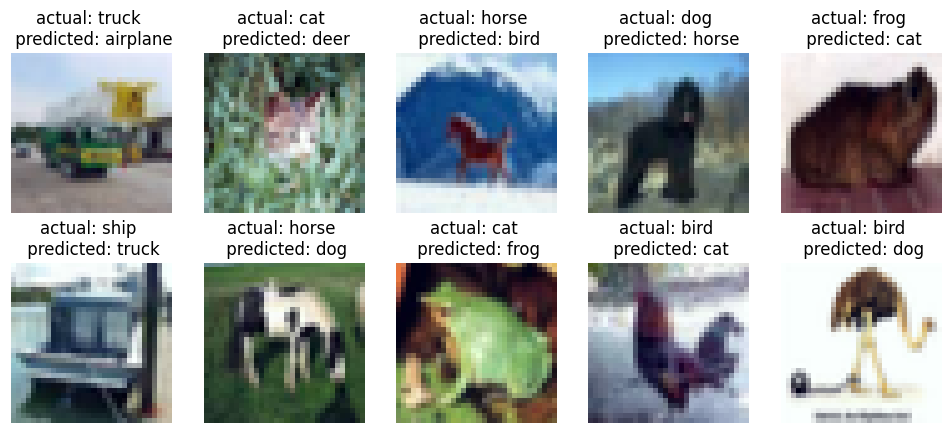

<Figure size 640x480 with 0 Axes>

In [176]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

for i, row in df_misclassified.sample(n=10).reset_index(drop=True).iterrows():
    ax = plt.subplot(2, 5, i+1)
    plt.axis('off')

    img = row['data']
    img = (img - img.min()) / (img.max() - img.min())
    img = np.moveaxis(img * 255, [0, 1, 2], [2, 0, 1])
    plt.imshow(img.astype(int), cmap='jet')

    ax.set_title(f"actual: {labels[row['actual']]} \n predicted: {labels[row['pred']]}")

plt.show()
plt.savefig('failed_ln.jpg')

## Display Results

In [177]:
df = pd.DataFrame({'train_losses': metrics['train_losses'], 'test_losses': metrics['test_losses']})

In [178]:
df.plot()

In [179]:
df = pd.DataFrame({'train_acc': metrics['train_acc'], 'test_acc': metrics['test_acc']})
df.plot()